# ML Lab 04 CLUSTERING

This notebook is for the clustering analysis!

## Utility functions

Some utility functions used below.

### Stats

Defining a function to print out some stats from our clustering.

**Homogeneity**: Homogeneity metric of a cluster labelling given the ground truth (y). A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. Score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labelling.

**Completeness**: score between 0.0 and 1.0. 1.0 stands for perfectly complete labelling based on the ground truth (y).

There are other metrics you can use as well. Do have a look at the [API Reference](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics).

In [10]:
from sklearn import metrics

def print_stats(n_clusters, n_noise, X, y, y_pred):
    print('Estimated number of clusters: %d' % n_clusters)
    print('Estimated number of noise points: %d' % n_noise)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, y_pred))
    print("Completeness: %0.3f" % metrics.completeness_score(y, y_pred))

### Plot

Defining a function to plot a figure of the clustering results from the algorithms applied further below.

This function has been modified from sklearn user guide code examples.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cluster_graph(X, y_pred, core_samples_mask, algorithm_name, n_clusters, cluster_centres=None):

    plt.rcParams.update({'font.size': 14, 'figure.figsize': (12, 9)}) # set font and plot size to be larger

    unique_labels = set(y_pred)

    colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [1, 1, 1, 1] # white for noise

        class_member_mask = (y_pred == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    # plots centroids, if provided
    if cluster_centres is not None:
        plt.plot(cluster_centres[:,0], cluster_centres[:,1], 'o', mew=10, ms=20, alpha=0.5)

    plt.title('%s with %d clusters' % (algorithm_name, n_clusters))
    plt.show()

## Blobs analsyis

### Dataset import

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ...
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


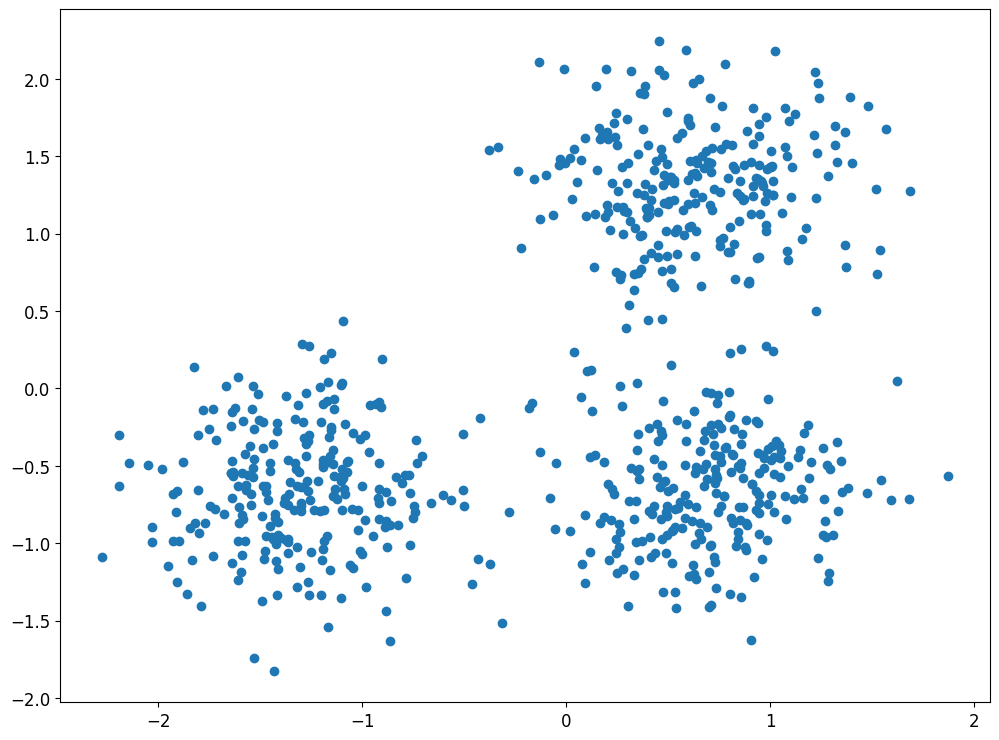

In [12]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

centers_matrix = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=750, centers=centers_matrix, cluster_std=0.4, random_state=0)

# Standardise features by removing the mean and scaling to unit variance
X_blobs = StandardScaler().fit_transform(X_blobs)

# This should print out as a 2D array (matrix)
print(X_blobs)

# Visualising in a scatter plot
plt.figure()
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

### k-means

**TODO**: tweak ``n_clusters`` for different (and hopefully some sensible clustering results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.945
Completeness: 0.945


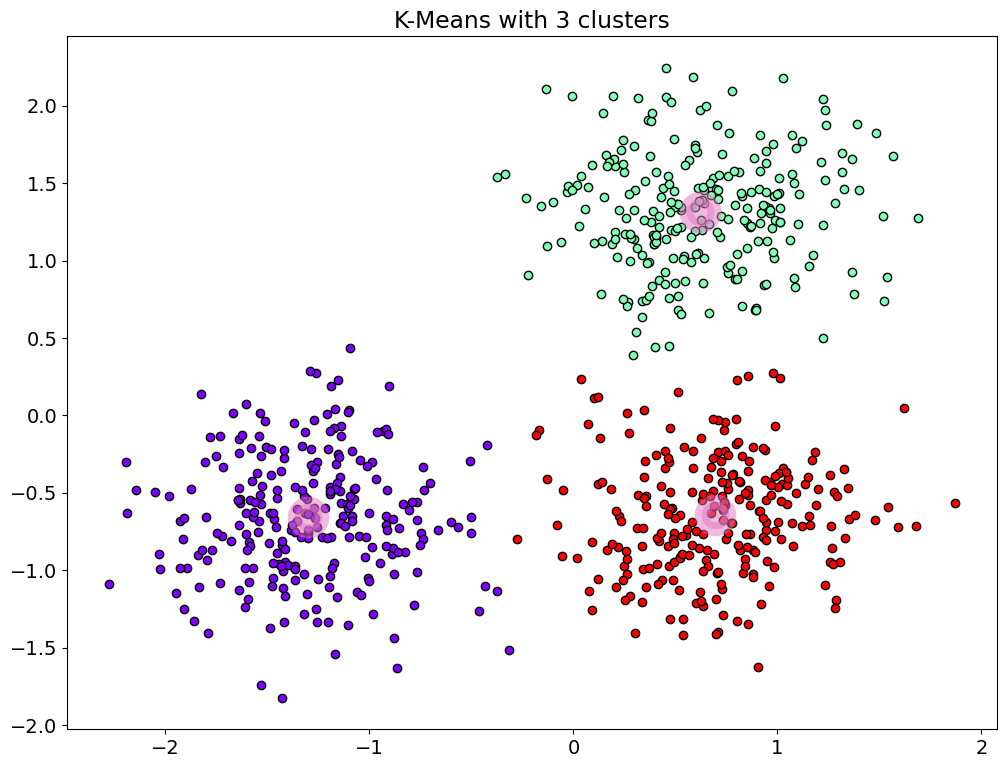

In [35]:
import numpy as np
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model = model.fit(X_blobs)
labels = model.labels_
cluster_centres = model.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Print stats and plot graph
print_stats(n_clusters_, n_noise_, X_blobs, y_blobs, labels)
plot_cluster_graph(X_blobs, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN

**TODO**: tweak ``eps`` and ``min_samples`` for different (and hopefully some sensible clustering results)

Estimated number of clusters: 3
Estimated number of noise points: 22
Homogeneity: 0.947
Completeness: 0.868


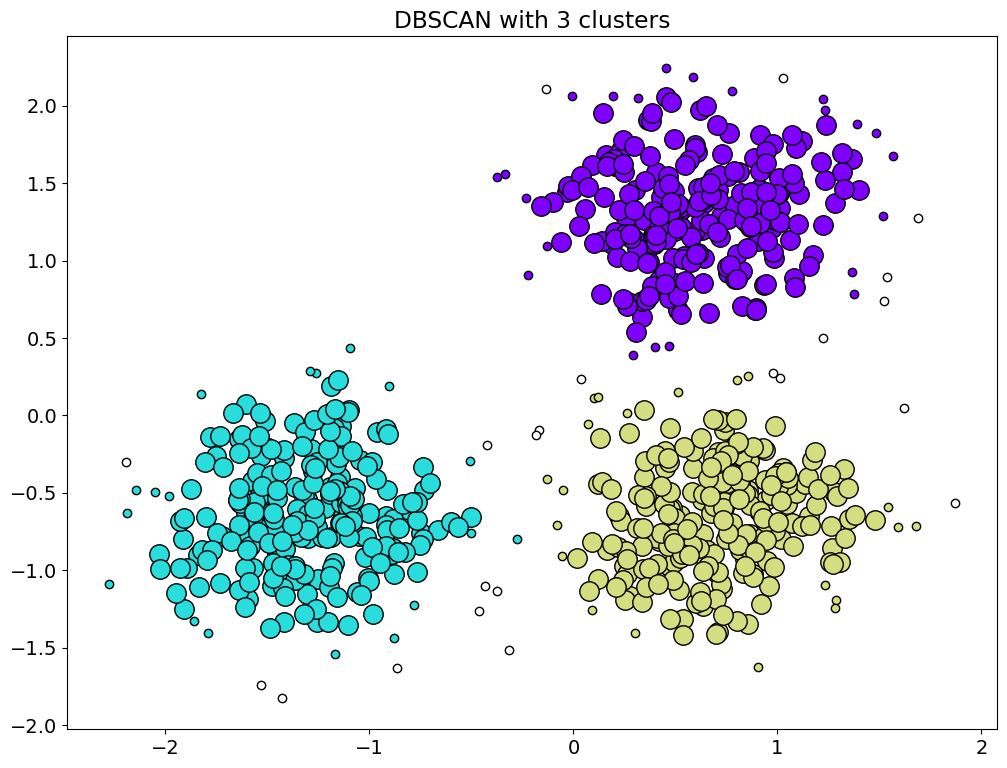

In [46]:
import numpy as np
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=11)
model = model.fit(X_blobs)
labels = model.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True

print_stats(n_clusters_, n_noise_, X_blobs, y_blobs, labels)
plot_cluster_graph(X_blobs, labels, core_samples_mask, 'DBSCAN', n_clusters_)

## Circle data analysis

### Dataset

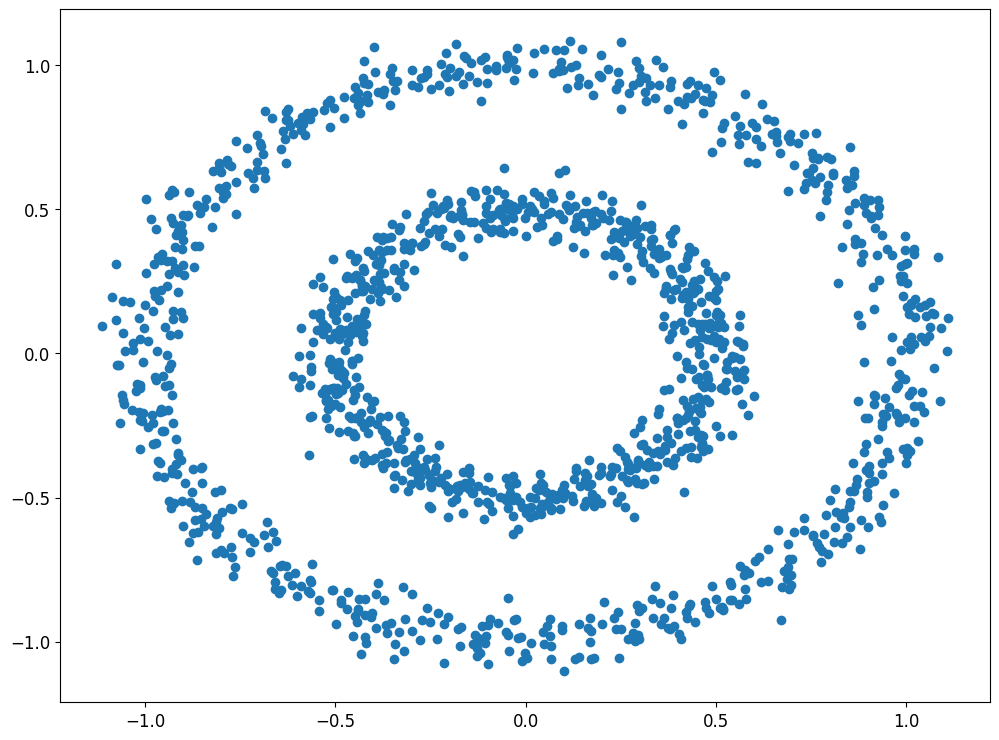

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

noisy_circles = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
X_circles = noisy_circles[0]
y_circles = noisy_circles[1]

plt.figure()
plt.scatter(X_circles[:,0], X_circles[:,1])

### K-Means

**TODO**: tweak ``n_clusters`` for different (and hopefully some sensible clustering results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Estimated number of clusters: 12
Estimated number of noise points: 0
Homogeneity: 0.995
Completeness: 0.279


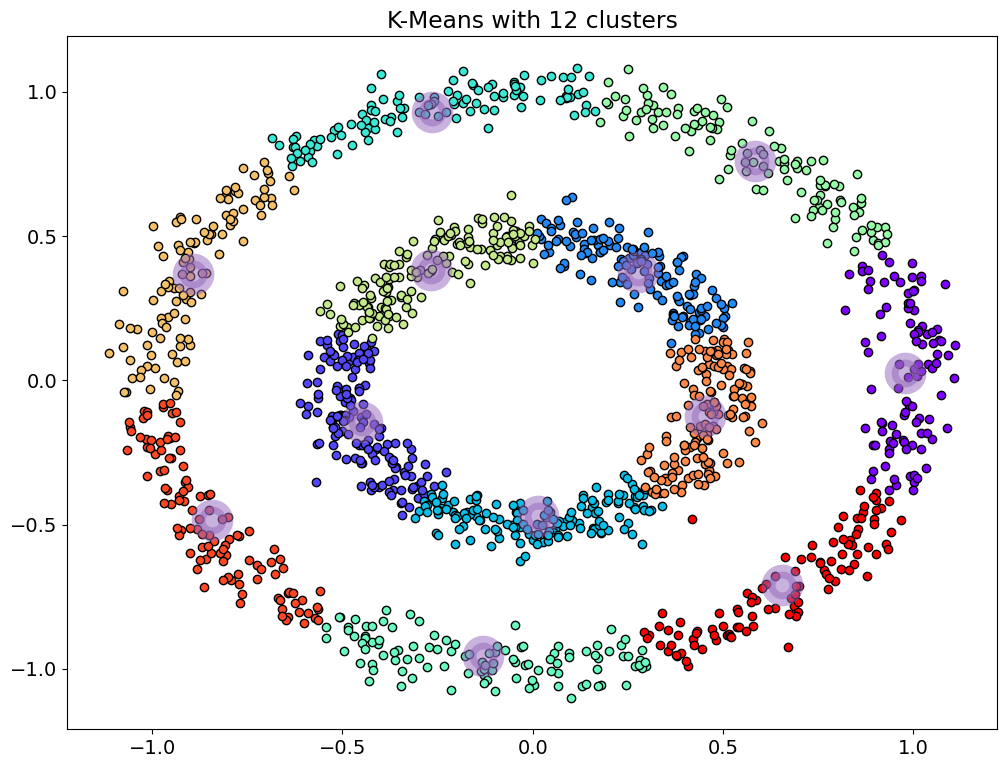

In [51]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12)
kmeans = kmeans.fit(X_circles)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Print stats and plot graph
print_stats(n_clusters_, n_noise_, X_circles, y_circles, labels)
plot_cluster_graph(X_circles, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN

**TODO**: tweak ``eps`` and ``min_samples`` for different (and hopefully some sensible clustering results)

[0 1 0 ... 1 1 1]
Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.999
Completeness: 0.986


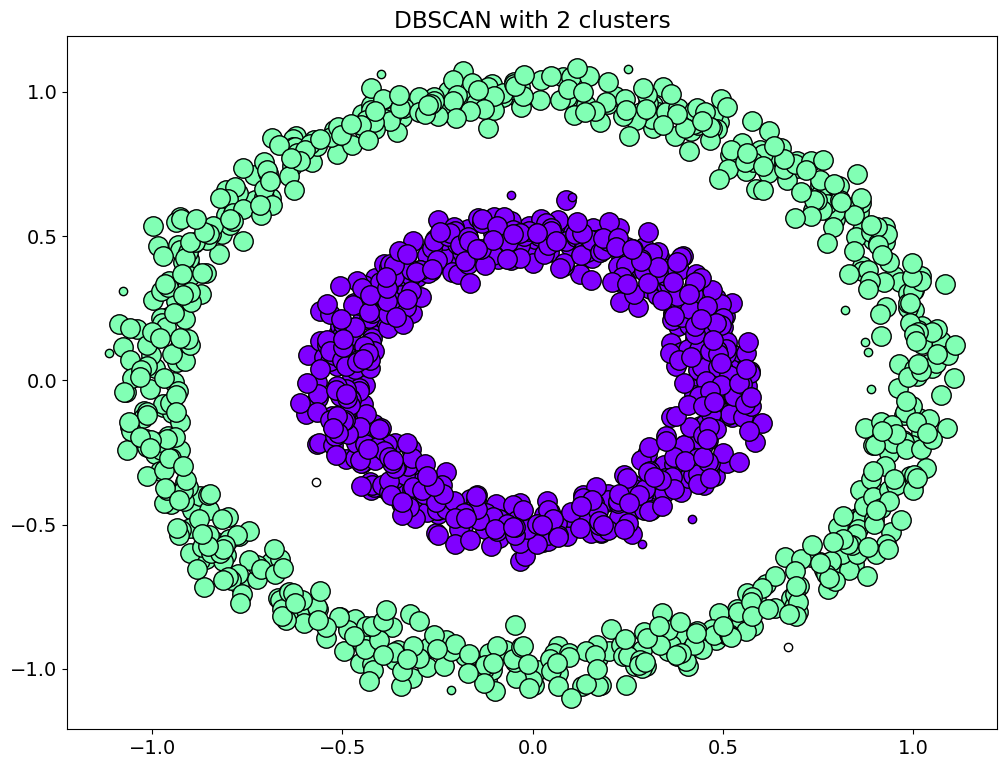

In [53]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=5)
db = db.fit(X_circles)
labels = db.labels_

import pprint as pprint
print(labels)

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

print_stats(n_clusters_, n_noise_, X_circles, y_circles, labels)
plot_cluster_graph(X_circles, labels, core_samples_mask, 'DBSCAN', n_clusters_)

## Clustering on the Iris dataset

An example of something you could do for the assignment dataset.

### Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

# load the iris.arff data set
data = arff.loadarff('data/iris.arff')
iris_df = pd.DataFrame(data[0])
iris_df['class'] = iris_df['class'].str.decode('utf-8') # fixes byte strings, avoiding strings like b'Iris-versicolor'

# print the top of the file (just to check it's read and processed OK)
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### k-means

#### Sepal length and width

To start with, simplifying this by using only 2 dimensions (features).

In [19]:
from sklearn.preprocessing import StandardScaler

X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

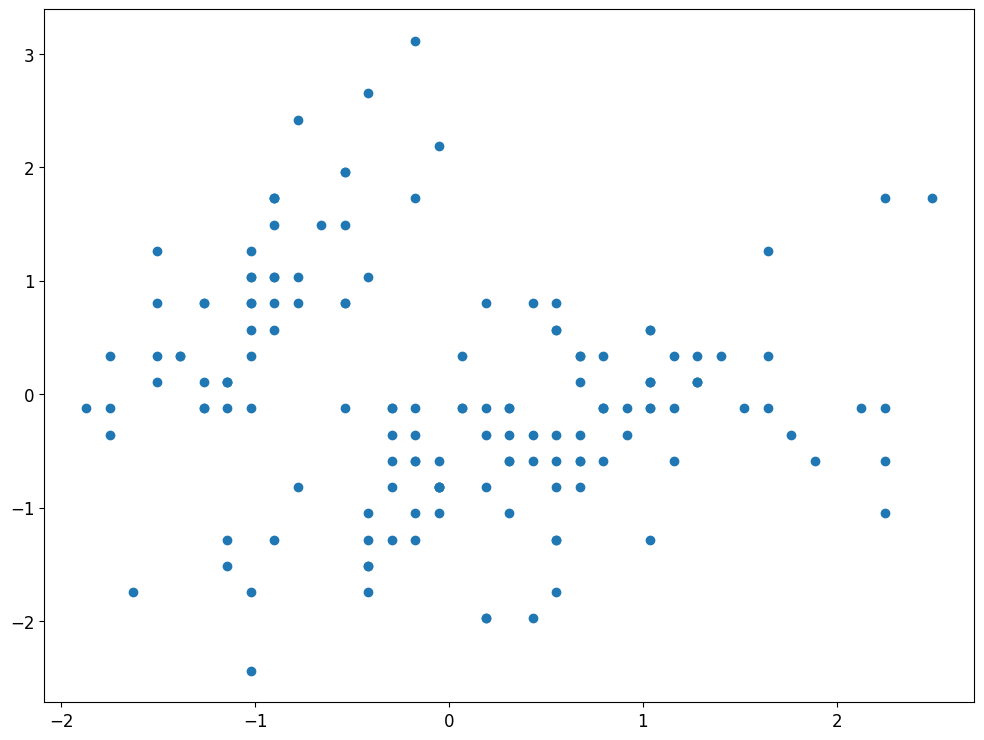

In [20]:
plt.figure()
plt.scatter(X_iris[:,0], X_iris[:,1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


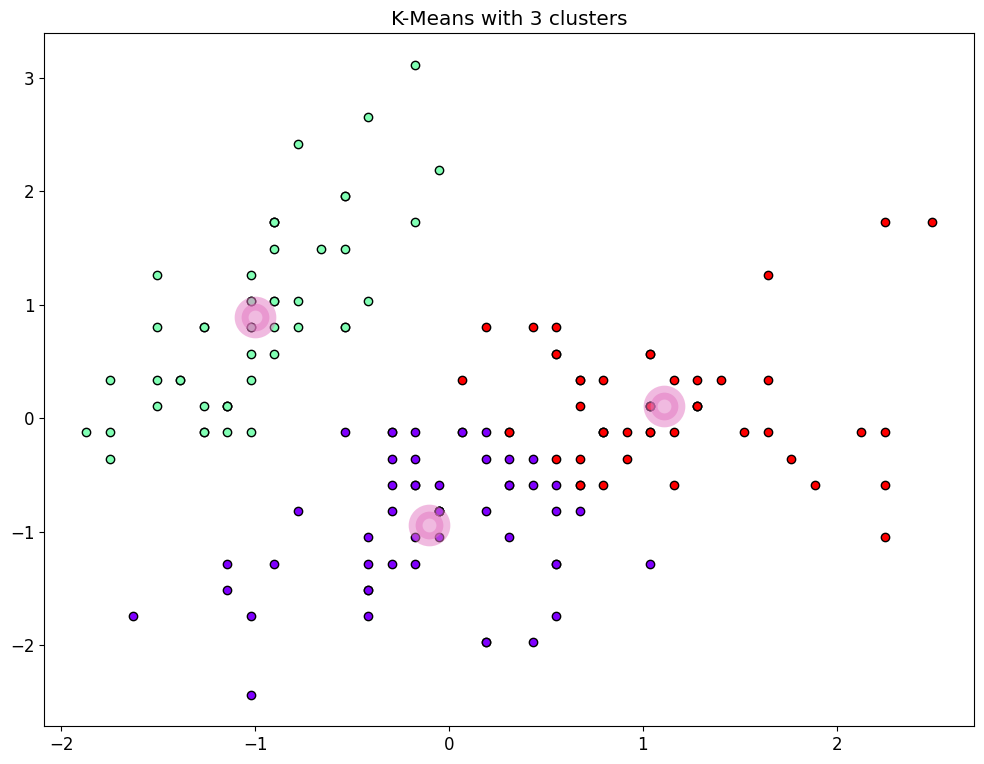

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_iris)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just a NumPy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Visualising the clusters
plot_cluster_graph(X_iris, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

#### All features

Note where the centroids end up, when doing it based on all features, but visualising the same two dimensions as above!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


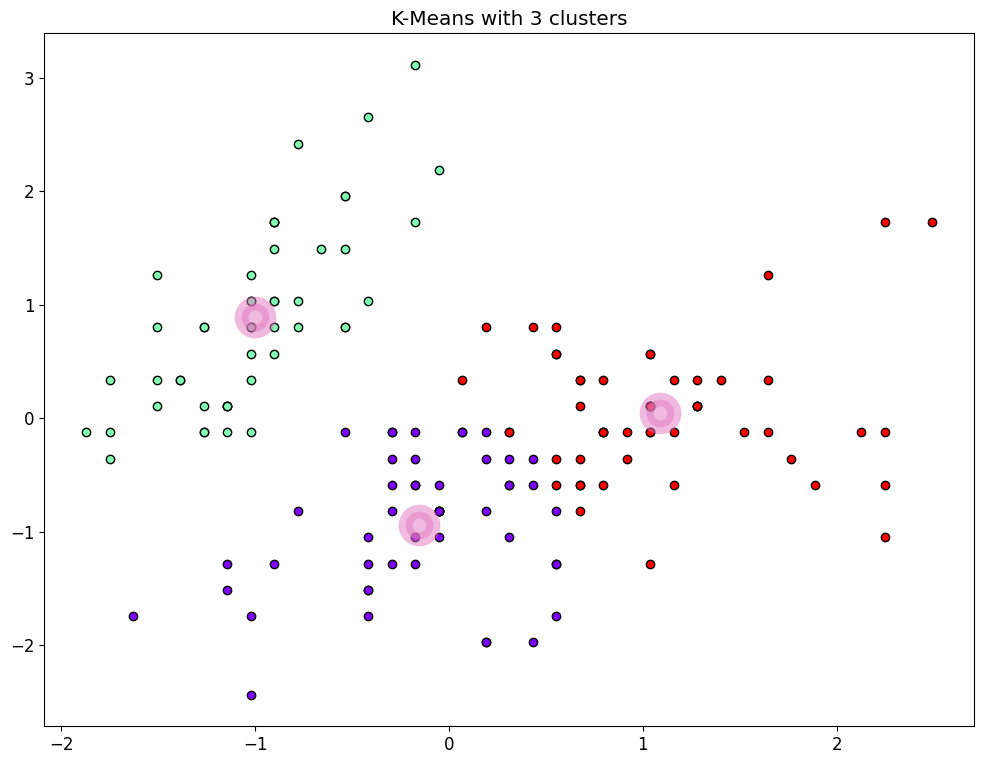

In [22]:
# Slices the Pandas DataFrame to get the entire feature matrix (X)
X_iris = iris_df.iloc[:,:len(iris_df.columns)-2]
X_iris = StandardScaler().fit_transform(X_iris)

# Perform clustering
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_iris)
labels = kmeans.labels_
cluster_centres = kmeans.cluster_centers_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - Not applicable to K-Means, as it doesn't have a concept of 'core' samples
# - So this is just an Numpy Array of 'False'
core_samples_mask = np.zeros_like(labels, dtype=bool)

# Visualising the results for the same two features used above
X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)
plot_cluster_graph(X_iris, labels, core_samples_mask, 'K-Means', n_clusters_, cluster_centres=cluster_centres)

### DBSCAN for noise detection

Here's an example for how DBSCAN can be used for noise detection.

First with 2 features, and then with all features.

#### Sepal length and width

Estimated number of clusters: 1
Estimated number of noise points: 5


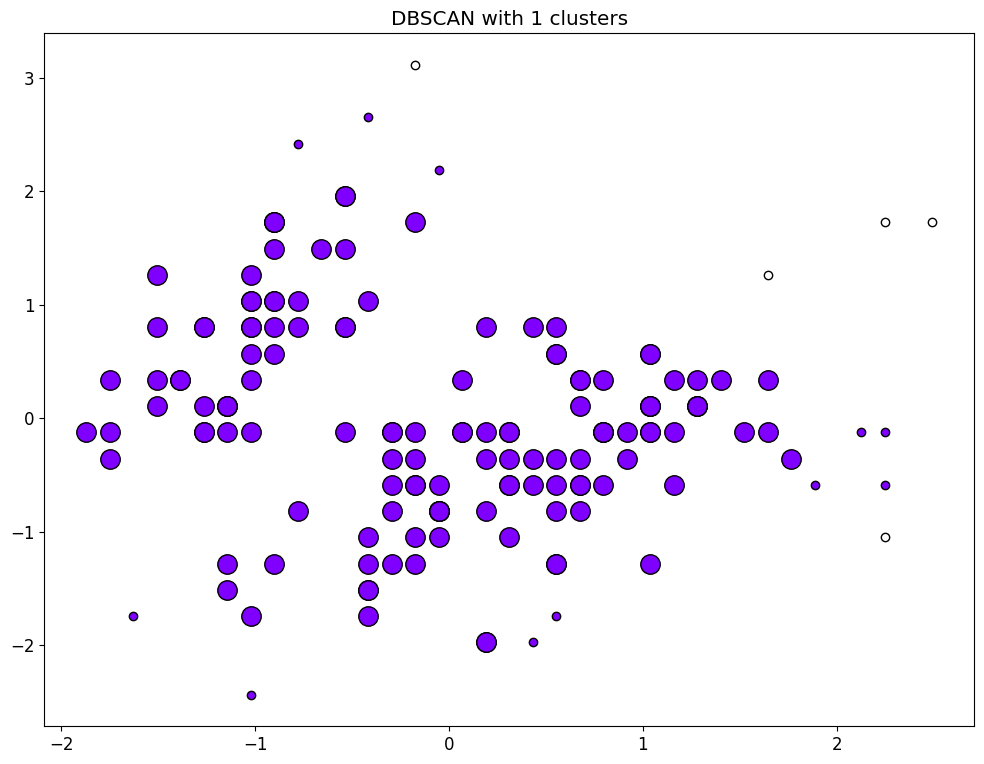

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

db = DBSCAN(eps=0.8, min_samples=10).fit(X_iris)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
# can't do all stats as above, as we don't have a ground truth of what clusters
# each data point should belong to as in the test data
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

#### All features

Note differences in potential noise when using all features, but visualising the same two dimensions as above!

In [24]:
# Slices the Pandas DataFrame to get the entire feature matrix (X)
X_iris = iris_df.iloc[:,:len(iris_df.columns)-1]

# Scales the feature values
X_iris = StandardScaler().fit_transform(X_iris)

db = DBSCAN(eps=0.8, min_samples=10).fit(X_iris)
labels = db.labels_

# Number of clusters in labels, ignoring noise (if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Create a mask for visualising the core samples in each cluster
# - First creates a NumPy array of False entries
# - Then sets the entries for the core instances to True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Printing some stats
# can't do all stats as above, as we don't have a ground truth of what clusters
# each data point should belong to as in the test data
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 8


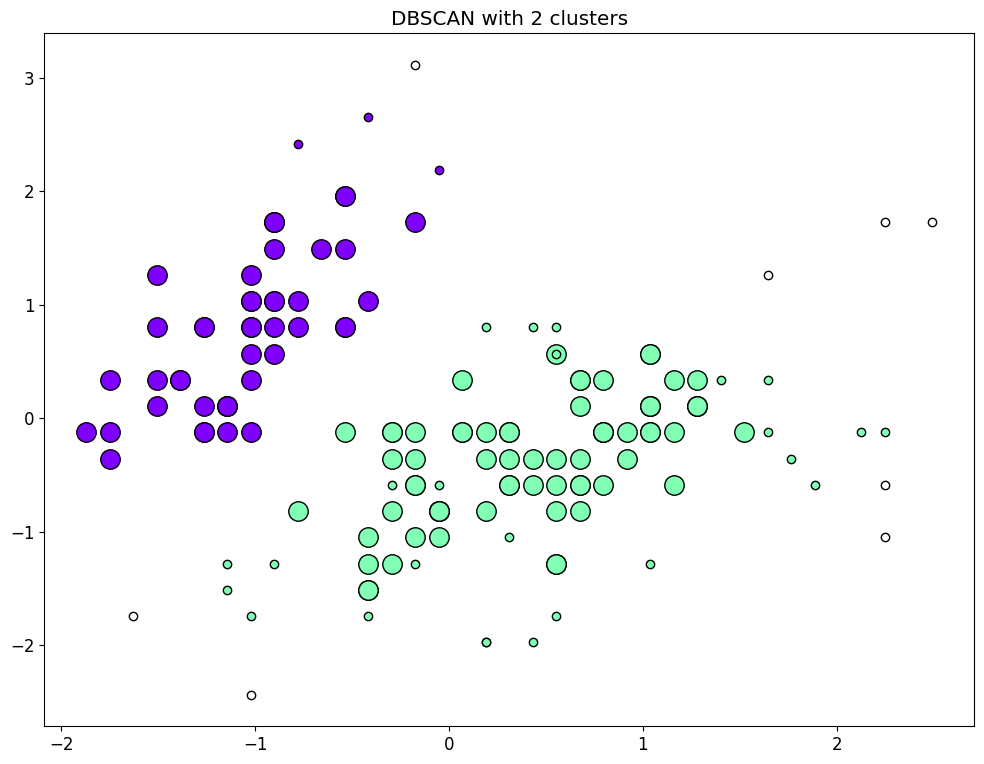

In [25]:
# Visualising the results for the same two features used above
X_iris = iris_df[["sepallength", "sepalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

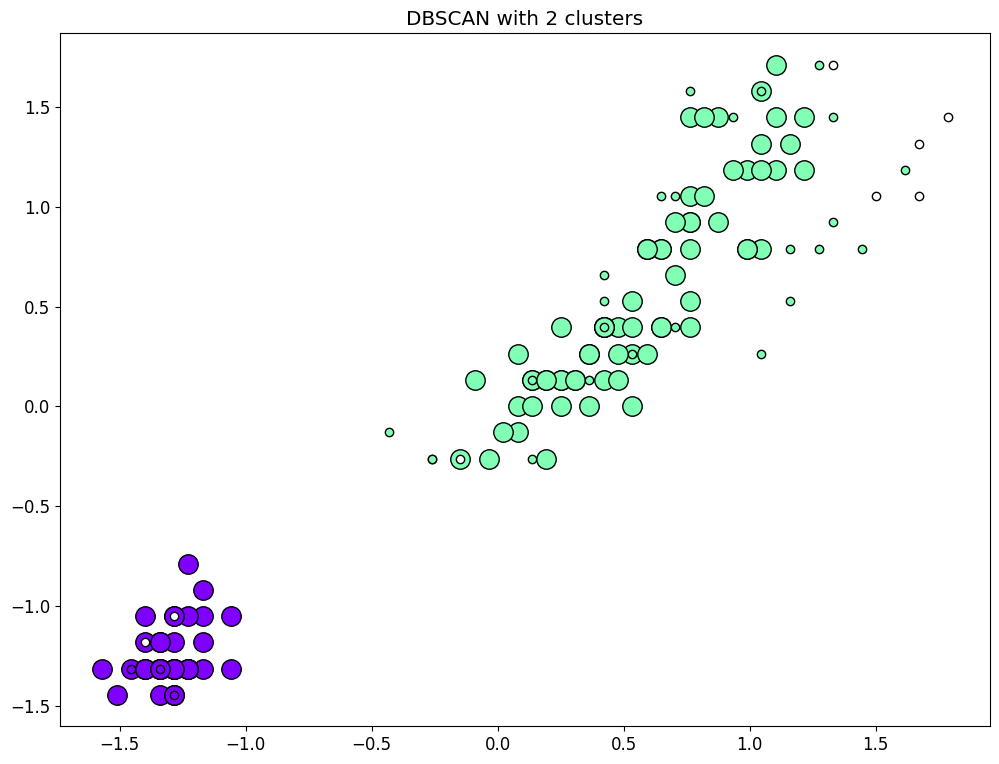

In [26]:
# Visualising the results for the petal length and width features
X_iris = iris_df[["petallength", "petalwidth"]]
X_iris = StandardScaler().fit_transform(X_iris)

# Plotting the clustering outputs
plot_cluster_graph(X_iris, labels, core_samples_mask, 'DBSCAN', n_clusters_)

### Flagging and outputting noise

First, adding a column to the dataset to indicate with a true/false if each row (instance) was flagged as noise.

Second, writing this to a CSV file, which you could then open up in Excel to look at if you wanted, for example.

In [27]:
# Add a column to our Pandas DataFrame with default values False
iris_df['NOISY'] = False

# Print which instances were noisy,
# and set flag in our new column to True for the noisy instances
print("Noisy instances / rows")
for i in range(labels.size):
    if labels[i] == -1:
        print("\t", i)
        iris_df.at[i, 'NOISY'] = True

# print out rows 115-135, so you can see several instances noted as noisy
iris_df.iloc[115:135].head(30)

Noisy instances / rows
	 15
	 41
	 60
	 109
	 117
	 118
	 122
	 131


,sepallength,sepalwidth,petallength,petalwidth,class,NOISY
115,6.4,3.2,5.3,2.3,Iris-virginica,False
116,6.5,3.0,5.5,1.8,Iris-virginica,False
117,7.7,3.8,6.7,2.2,Iris-virginica,True
118,7.7,2.6,6.9,2.3,Iris-virginica,True
119,6.0,2.2,5.0,1.5,Iris-virginica,False
120,6.9,3.2,5.7,2.3,Iris-virginica,False
121,5.6,2.8,4.9,2.0,Iris-virginica,False
122,7.7,2.8,6.7,2.0,Iris-virginica,True
123,6.3,2.7,4.9,1.8,Iris-virginica,False
124,6.7,3.3,5.7,2.1,Iris-virginica,False


In [28]:
# write new dataset file to disk
iris_df.to_csv ('data/iris-noise.csv', index = False, header=True)